<a href="https://githubtocolab.com/jmvazqueznicolas/Pneumonia_detection/blob/main/DetecciónNeumonia_Anáhuac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

### Diplomado de Inteligencia Artificial - Universidad Virtual Anáhuac
### CNN para la detección de neumonía

### Objetivo: Que los alumnos conozcan el entorno de Colab y como se puede
### utilizar para entrenar un modelo de inteligencia artificial



In [1]:
# Descargamos el dataset desde AWS
!wget "https://dataset-mlproduccion.s3.us-west-1.amazonaws.com/Neumonia_Dataset.zip"

--2022-10-19 20:39:28--  https://dataset-mlproduccion.s3.us-west-1.amazonaws.com/Neumonia_Dataset.zip
Resolving dataset-mlproduccion.s3.us-west-1.amazonaws.com (dataset-mlproduccion.s3.us-west-1.amazonaws.com)... 52.219.192.58
Connecting to dataset-mlproduccion.s3.us-west-1.amazonaws.com (dataset-mlproduccion.s3.us-west-1.amazonaws.com)|52.219.192.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1228710616 (1.1G) [application/zip]
Saving to: ‘Neumonia_Dataset.zip’

Neumonia_Dataset.zi 100%[===================>]   1.14G  19.4MB/s    in 63s     

2022-10-19 20:40:32 (18.6 MB/s) - ‘Neumonia_Dataset.zip’ saved [1228710616/1228710616]



In [2]:
# Copiamos los archivos de Drive al entorno de Colab
!unzip -uq "Neumonia_Dataset.zip"

# Se descomprime el dataset

In [3]:
# Bibliotecas a emplear
import os
import cv2
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [4]:
# Definir las rutas donde estan las imagenes
train_folder= '/content/Neumonia_Dataset/train'
val_folder = '/content/Neumonia_Dataset/val'
test_folder = '/content/Neumonia_Dataset/test'

In [5]:
# Se toman 4 imagenes de forma aleatoria
os.listdir(train_folder)
train_sanas = train_folder+'/NORMAL/'
train_neum = train_folder+'/PNEUMONIA/'
img_sanas = []
img_neumonia = []
for i in range(4):
    num_alea = np.random.randint(len(os.listdir(train_sanas)))
    img_sanas.append(train_sanas + os.listdir(train_sanas)[num_alea])
    img_neumonia.append(train_neum + os.listdir(train_neum)[num_alea])

Primer fila: personas sin neumonía
Segunda fila: personas con neumonía


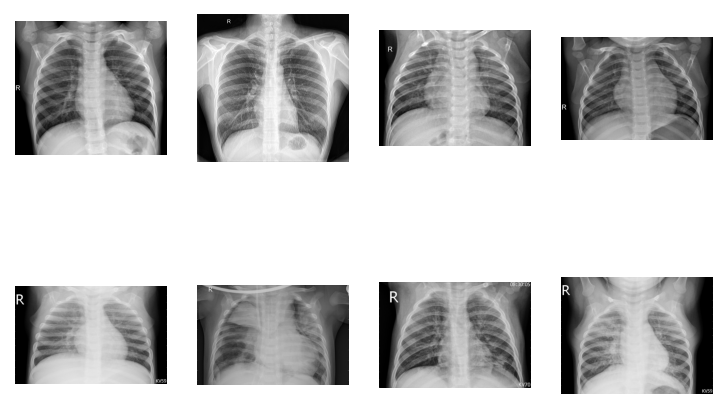

In [7]:
# Se muestran radiografías de personas con y sin neumonía
print('Primer fila: personas sin neumonía')
print('Segunda fila: personas con neumonía')
plt.rcParams['figure.dpi'] = 150
for num_imagen in range(8):
    if num_imagen<4:
        imagen = cv2.imread(img_sanas[num_imagen])
    else:
        imagen = cv2.imread(img_neumonia[num_imagen-4])
    plt.subplot(2,4,num_imagen+1)
    plt.imshow(imagen)
    plt.axis('off')
plt.show()

In [8]:
# Red neuronal convolucional
cnn = models.Sequential()

# Capas convolucionales y de pooling
cnn.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Flatten())

# Capas densamente conectadas
cnn.add(layers.Dense(activation = 'relu', units = 128))
cnn.add(layers.Dense(activation = 'sigmoid', units = 1))

# Compilar el modelo neuronal
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
# Detalle de la red neuronal convolucional
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [10]:
# Preprocesamiento de las imagenes
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# Normalización de imagenes
test_datagen = ImageDataGenerator(rescale = 1./255)

# Generación de los conjuntos de entrenamiento, validación y prrueba
training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (150, 150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (150, 150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 3512 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [11]:
cnn_model = cnn.fit(training_set,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/50
100/100 [==============================] - 45s 366ms/step - loss: 0.4325 - accuracy: 0.8015 - val_loss: 0.4195 - val_accuracy: 0.8460
Epoch 2/50
100/100 [==============================] - 37s 375ms/step - loss: 0.2742 - accuracy: 0.8885 - val_loss: 0.1654 - val_accuracy: 0.9340
Epoch 3/50
100/100 [==============================] - 37s 368ms/step - loss: 0.2215 - accuracy: 0.9125 - val_loss: 0.1434 - val_accuracy: 0.9520
Epoch 4/50
100/100 [==============================] - 37s 369ms/step - loss: 0.2381 - accuracy: 0.9050 - val_loss: 0.1338 - val_accuracy: 0.9580
Epoch 5/50
100/100 [==============================] - 36s 363ms/step - loss: 0.2142 - accuracy: 0.9145 - val_loss: 0.1266 - val_accuracy: 0.9580
Epoch 6/50
100/100 [==============================] - 38s 379ms/step - loss: 0.1780 - accuracy: 0.9292 - val_loss: 0.0923 - val_accuracy: 0.9680
Epoch 7/50
100/100 [==============================] - 36s 364ms/step - loss: 0.1959 - accuracy: 0.9270 - val_loss: 0.1182 - val_ac

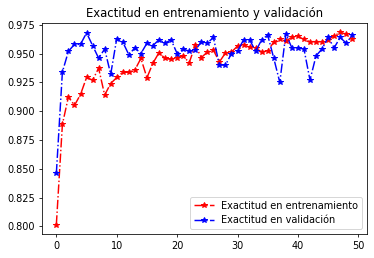

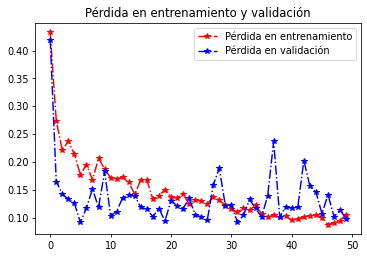

In [12]:
# Graficas de la presición y función de perdida

acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']

epochs = range(len(acc))

plt.rcParams['figure.dpi'] = 70
plt.plot(epochs, acc, '-.r*', label='Exactitud en entrenamiento')
plt.plot(epochs, val_acc, '-.b*', label='Exactitud en validación')
plt.title('Exactitud en entrenamiento y validación')
plt.legend()
plt.figure()

plt.plot(epochs, loss, '-.r*', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, '-.b*', label='Pérdida en validación')
plt.title('Pérdida en entrenamiento y validación')
plt.legend()

plt.show()

In [13]:
test_accu = cnn.evaluate(test_set,steps=50)

50/50 [==============================] - 9s 176ms/step - loss: 0.3628 - accuracy: 0.9090


In [14]:
print('La exactitud en el conjunto de prueba es: ',test_accu[1]*100, '%')

La exactitud en el conjunto de prueba es:  90.89999794960022 %


1/1 [==============================] - 0s 15ms/step
Persona sin neumonia


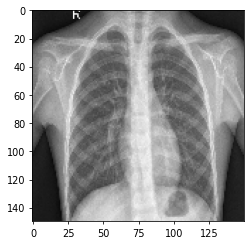

In [16]:
# Predicción sobre una imagen de prueba

img_ori = cv2.imread('/content/Neumonia_Dataset/test/NORMAL/IM-0001-0001.jpeg')
#img_ori = cv2.imread('/content/Neumonia_Dataset/test/PNEUMONIA/person119_bacteria_566.jpeg')

img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_ori, (150, 150), interpolation=cv2.INTER_CUBIC)
imagen_a_probar = np.reshape(img,(1,150, 150, 3))
predictions = cnn.predict(imagen_a_probar)
if(predictions == 0):
  print('Persona sin neumonia')
else:
  print('Persona con neumonia')
plt.imshow(img)
plt.show()